In [2]:
# Assignment 17

# SVM : Support Vector Machine

# SVC : SV Classifier

In [3]:
import pandas as pd 

df = pd.read_csv('mushroom.csv')

df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.shape

(2000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
# checking for duplicates

df.duplicated().sum()

1024

In [7]:
# dropping duplicates

df = df.drop_duplicates()

df.duplicated().sum()

0

In [8]:
# dropping non-relavent columns

df.drop('Unnamed: 0',axis=1,inplace=True)

df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [9]:
# getting unique values from categorical features

cat_feats = df.select_dtypes('object').columns

for feat in cat_feats:
    print(f'{feat} : {df[feat].unique()}')

cap_shape : ['sunken' 'flat' 'bell' 'convex' 'conical']
cap_surface : ['scaly' 'fibrous' 'grooves' 'smooth']
cap_color : ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
bruises : ['no' 'yes']
odor : ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
gill_attachment : ['descending' 'notched' 'free' 'attached']
gill_spacing : ['distant' 'crowded' 'close']
gill_size : ['broad' 'narrow']
gill_color : ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']
stalk_shape : ['tapering' 'enlarging']
stalk_root : ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']
stalk_surface_above_ring : ['smooth' 'silky' 'scaly' 'fibrous']
stalk_surface_below_ring : ['silky' 'scaly' 'smooth' 'fibrous']
stalk_color_above_ring : ['gray' 'cinnamon' 'yellow' 'white' 'red' 'buff' 'orange' 'brown' 'pink']
stalk_color_below_ring : ['yellow' 'brown' 'gray' 'pink' 'white' 'red' 'orange' 'buff' 'cinnamon']
veil

<Figure size 1000x800 with 0 Axes>

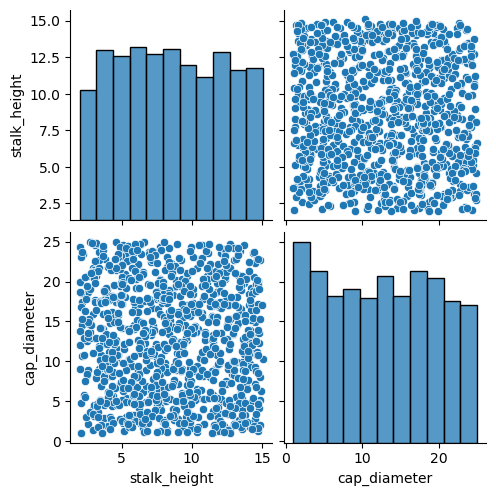

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.pairplot(df)

In [11]:
# indepentdent variables & target variable

X = df.drop('class',axis=1)
y = df['class']

class
poisonous    618
edible       358
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='count'>

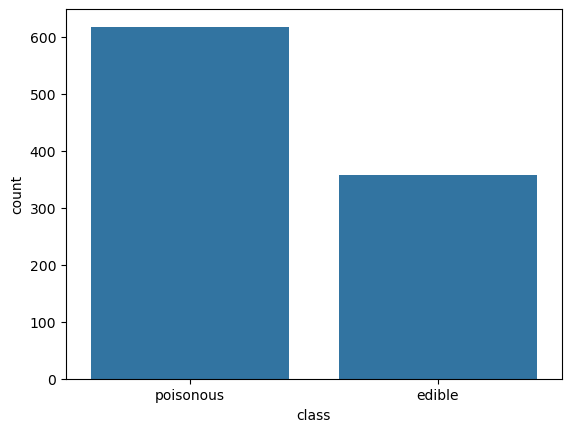

In [12]:
# checking for imbalanceness 

print(y.value_counts())

sns.countplot(x=y)

In [13]:
# train_test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38,stratify=y)

In [14]:
# encoding target 

y_train = y_train.map({'edible':0,'poisonous':1})
y_test = y_test.map({'edible':0,'poisonous':1})

In [15]:
# encoding features

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oe_feats = [cols for cols in X_train.select_dtypes('object').columns if X_train[cols].nunique()<=3]
ohe_feats = [cols for cols in X_train.select_dtypes('object').columns if cols not in oe_feats]
num_feats = X_train.select_dtypes(include=['int64','float64']).columns

In [16]:
encoder = ColumnTransformer([
    ('oe',OrdinalEncoder(),oe_feats),
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False),ohe_feats),
    ('scaler',StandardScaler(),num_feats)
]
)

encoder.fit(X_train)

X_train_t = encoder.transform(X_train)
X_test_t = encoder.transform(X_test)

In [17]:
# converting X_train_t & X_test_t to DataFrame
feature_names = encoder.get_feature_names_out()

X_train_df = pd.DataFrame(X_train_t, columns=feature_names)
X_test_df = pd.DataFrame(X_test_t, columns=feature_names)

X_train_df.head()

,oe__bruises,oe__gill_spacing,oe__gill_size,oe__stalk_shape,oe__veil_type,oe__ring_number,ohe__cap_shape_bell,ohe__cap_shape_conical,ohe__cap_shape_convex,ohe__cap_shape_flat,...,ohe__population_solitary,ohe__habitat_grasses,ohe__habitat_leaves,ohe__habitat_meadows,ohe__habitat_paths,ohe__habitat_urban,ohe__habitat_waste,ohe__habitat_woods,scaler__stalk_height,scaler__cap_diameter
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.742070,0.592627
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.072364,-1.052806
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.121588,-0.218376
3,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.749337,1.573036
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.692588,-1.364772


In [18]:
# feature reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_train_reduced = pca.fit_transform(X_train_t)
X_test_reduced = pca.transform(X_test_t)

In [19]:
# model building

from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1, gamma='scale',class_weight='balanced',probability=True)

model.fit(X_train_reduced,y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [20]:
# prediction

y_pred = model.predict(X_test_reduced)

y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]

In [21]:
# measuring performace

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(f'accuracy score = {accuracy_score(y_test,y_pred)}')

print(f'report = \n{classification_report(y_test,y_pred)}')

accuracy score = 0.4744897959183674
report = 
              precision    recall  f1-score   support

           0       0.34      0.44      0.38        72
           1       0.60      0.49      0.54       124

    accuracy                           0.47       196
   macro avg       0.47      0.47      0.46       196
weighted avg       0.51      0.47      0.48       196



In [22]:
print(f'confusion matrix = \n{confusion_matrix(y_test,y_pred)}')

confusion matrix = 
[[32 40]
 [63 61]]


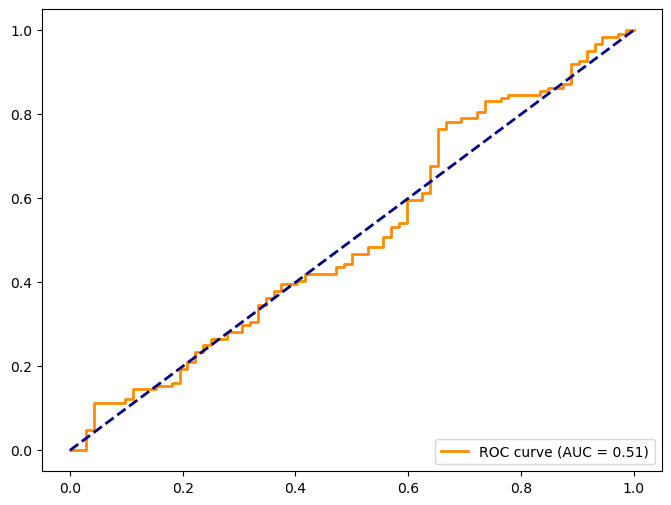

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")

In [24]:
# hyperparam tuning
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly','linear'] 
}

grid_search = GridSearchCV(SVC(class_weight='balanced', probability=True), params, cv=3)
grid_search.fit(X_train_reduced, y_train)

best_model = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


In [25]:
# Evaluate tunned model

y_pred_ = best_model.predict(X_test_reduced)

print(f'accuracy score = {accuracy_score(y_test,y_pred_)}')

print(f'report = \n{classification_report(y_test,y_pred_)}')

print(f'confusion matrix = \n{confusion_matrix(y_test,y_pred_)}')

accuracy score = 0.6275510204081632
report = 
              precision    recall  f1-score   support

           0       0.43      0.04      0.08        72
           1       0.63      0.97      0.77       124

    accuracy                           0.63       196
   macro avg       0.53      0.50      0.42       196
weighted avg       0.56      0.63      0.51       196

confusion matrix = 
[[  3  69]
 [  4 120]]


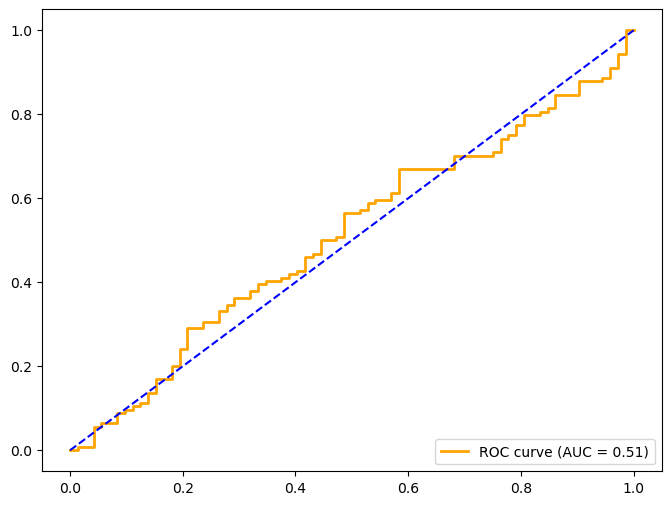

In [26]:
# visualizing performance

y_pred_proba_ = best_model.predict_proba(X_test_reduced)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_)

roc_auc_ = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc_:.2f})')
plt.plot([0, 1], [0, 1], 'b--')
plt.legend(loc="lower right")

#### Interview Question 

1. SVC's practical implications in real-world classification tasks stem from their ability to handle complex, high-dimensional data effectively,memory efficiency & versatility with kernels (linear,poly,rbf)

   - Real-World Applications

        * Image Classification: used in facial recognition, object detection, and handwriting recognition. They can effectively classify images represented as high-dimensional feature vectors

        * Bioinformatics: used to classify patients based on their gene expression profiles or to identify protein structures

        * Geospatial Data Analysis: used in remote sensing, satellite imagery


<Axes: >

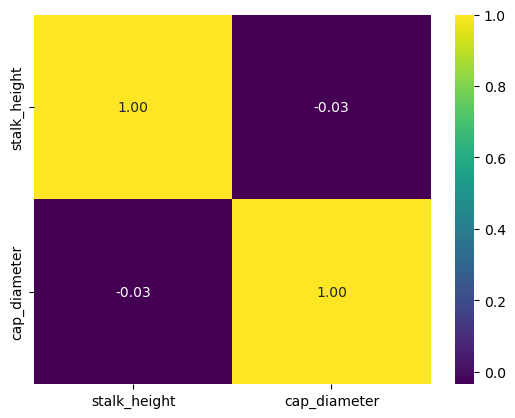

In [43]:
# TASK 1
# numerical features correlation 
import seaborn as sns

corr = df[['stalk_height','cap_diameter']].corr()
sns.heatmap(corr,cmap='viridis',annot=True,fmt='.2f')

<Axes: >

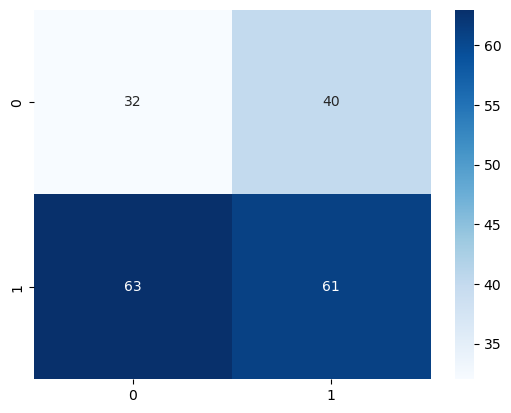

In [44]:
# TASK 5

# confusion matrix heatmap for svc
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True)

<Axes: >

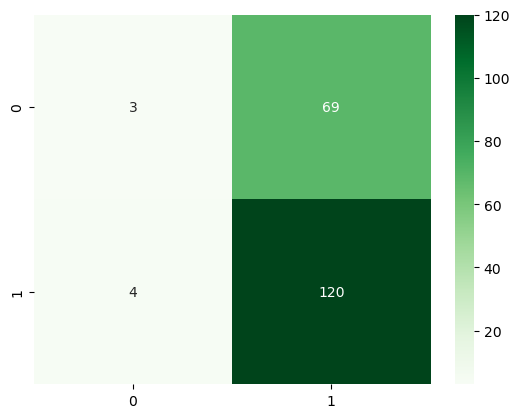

In [45]:
# TASK 5
# confusion matrix heatmap for best model

sns.heatmap(confusion_matrix(y_test,y_pred_),cmap='Greens',annot=True,fmt='d')

accuracy score = 0.6377551020408163
report = 
              precision    recall  f1-score   support

           0       0.60      0.04      0.08        72
           1       0.64      0.98      0.77       124

    accuracy                           0.64       196
   macro avg       0.62      0.51      0.43       196
weighted avg       0.62      0.64      0.52       196

confusion matrix = 
[[  3  69]
 [  2 122]]


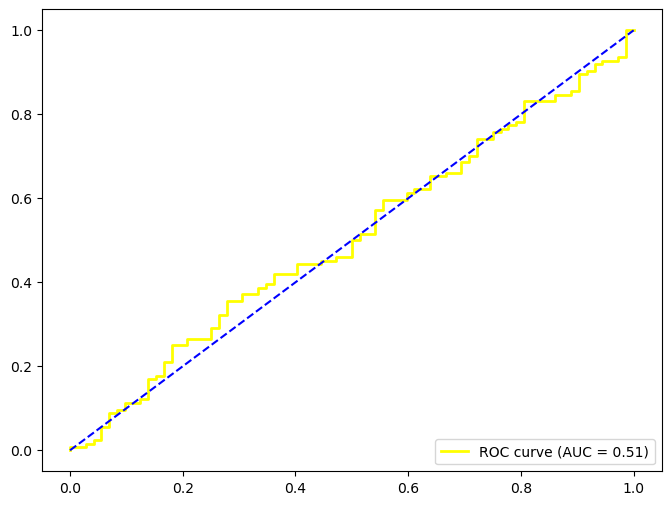

In [48]:
# TASK 7
# comparing models (kernel) with 'rbf' & 'linear' with 'poly'

# 'rbf' kernel

model_rbf = SVC(kernel='rbf', C=0.1, gamma='scale',class_weight='balanced',probability=True)

model_rbf.fit(X_train_reduced,y_train)

y_pred_rbf = model_rbf.predict(X_test_reduced)

print(f'accuracy score = {accuracy_score(y_test,y_pred_rbf)}')

print(f'report = \n{classification_report(y_test,y_pred_rbf)}')

print(f'confusion matrix = \n{confusion_matrix(y_test,y_pred_rbf)}')

y_pred_proba_ = model_rbf.predict_proba(X_test_reduced)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_)

roc_auc_ = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label=f'ROC curve (AUC = {roc_auc_:.2f})')
plt.plot([0, 1], [0, 1], 'b--')
plt.legend(loc="lower right")

accuracy score = 0.46938775510204084
report = 
              precision    recall  f1-score   support

           0       0.34      0.47      0.40        72
           1       0.60      0.47      0.53       124

    accuracy                           0.47       196
   macro avg       0.47      0.47      0.46       196
weighted avg       0.51      0.47      0.48       196

confusion matrix = 
[[34 38]
 [66 58]]


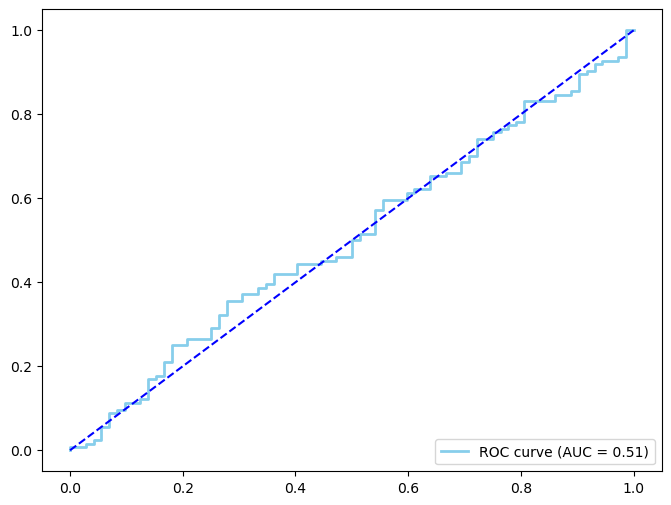

In [47]:
# 'linear' kernel 

model_lnr = SVC(kernel='linear', C=0.1, gamma='scale',class_weight='balanced',probability=True)

model_lnr.fit(X_train_reduced,y_train)

y_pred_lnr = model_lnr.predict(X_test_reduced)

print(f'accuracy score = {accuracy_score(y_test,y_pred_lnr)}')

print(f'report = \n{classification_report(y_test,y_pred_lnr)}')

print(f'confusion matrix = \n{confusion_matrix(y_test,y_pred_lnr)}')

y_pred_proba_ = model_rbf.predict_proba(X_test_reduced)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_)

roc_auc_ = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'ROC curve (AUC = {roc_auc_:.2f})')
plt.plot([0, 1], [0, 1], 'b--')
plt.legend(loc="lower right")